In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_img_path="car1.jpeg"

In [31]:
def read_img(path, grayscale=True):
    img=cv2.imread(path)
    if grayscale:
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
        return img
    car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
    return car1_cv2_BGR_RGB
  

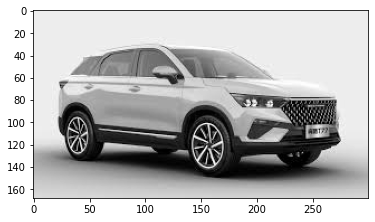

In [25]:
car=read_img(car_img_path)

In [32]:
color_car=read_img(car_img_path, grayscale=False)

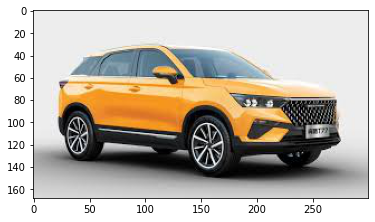

In [20]:

car1_cv2=cv2.imread("car1.jpeg")
car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)


In [33]:
car.shape

(168, 300)

In [34]:
color_car.shape

(168, 300, 3)

In [40]:
#(1,r,c,1)
row, col=car.shape
car=car.reshape(1,row,col,1)# gray scale image
# for color image
#car=color_car.reshape(1,row,col,3)
car.shape

(1, 168, 300, 1)

In [44]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [45]:
3*3 +1

10

In [46]:
out=conv_model.predict(car)

In [47]:
out.shape

(1, 166, 298, 1)

In [48]:
(168-3+0)//1 +1

166

In [49]:
(300-3)//1 +1

298

In [52]:
row,col=out.shape[1:-1]
reshape_out=out.reshape(row,col)

In [53]:
reshape_out.shape

(166, 298)

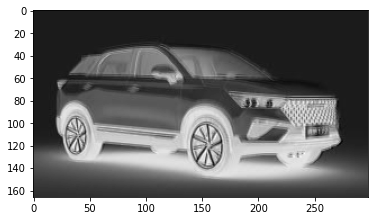

In [54]:
plt.imshow(reshape_out, cmap="gray")

# For Color image

In [55]:
row, col,depth=color_car.shape
color_car=color_car.reshape(1,row,col,depth)
color_car.shape

(1, 168, 300, 3)

In [57]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
